# BITS F464 : Machine Learning Assignment 1
Data Exploration, Pre-processing and Data Wrangling using Scikit Learn

Adit Rastogi <br>
2022A7PS1330H <br><br>
Deeptansh Gupta <br>
2022A7PS1336H <br><br>
Anirban Nayak <br>
2022A3PS0705H <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#html export
import plotly.io as pio
pio.renderers.default = 'notebook'

#pdf export
!pip install Pyppeteer
!pyppeteer-install

chromium is already installed.


In [2]:
#please fill the dataset path as required
data = pd.read_csv("./housing.csv")

## Data Pre-processing

In [3]:
print(data.shape)
data.head()

(20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [4]:
df = pd.DataFrame(data)

### Using the Describe Method

In [5]:
summary = df.describe()

# Styling 
styled_summary = (summary.style
                  .format("{:.2f}")  # Format numbers to 2 decimal places
                  .background_gradient(cmap='coolwarm')  # Adding color gradient
                  .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#404040'), ('color', 'white')]}])  # Style headers
                  )

display(styled_summary)

### Displaying Median and Standard Deviation

In [6]:
median = df.median(numeric_only=True)
std_dev = df.std(numeric_only=True)

summary = pd.DataFrame({
    'Median': median,
    'Standard Deviation': std_dev
})

# Styling
styled_summary = (summary.style
                  .format("{:.2f}")  # Format numbers to 2 decimal places
                  .background_gradient(cmap='coolwarm')  # Add color gradient
                  .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#404040'), ('color', 'white')]}])  # Style headers
                  )

display(styled_summary)


### Creating Python Snippet code to effectively visualize Descriptive Statistics

In [7]:
describe_df = df.describe()

# Calculating median and standard deviation
median = df.median(numeric_only=True)
std_dev = df.std(numeric_only=True)

# Appendind median and standard deviation to describe_df
describe_df.loc['median'] = median
describe_df.loc['std'] = std_dev

# Removing 25%, 50%, and 75% statistics
describe_df = describe_df.drop(['25%', '50%', '75%'])

# Reordering the rows
describe_df = describe_df.loc[['count', 'mean', 'median', 'std', 'min', 'max']]

# Styling
styled_summary = (describe_df.style
                  .format("{:.2f}")  # Format numbers to 2 decimal places
                  .background_gradient(cmap='coolwarm')  # Add color gradient
                  .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#404040'), ('color', 'white')]}])  # Style headers
                  )

display(styled_summary)

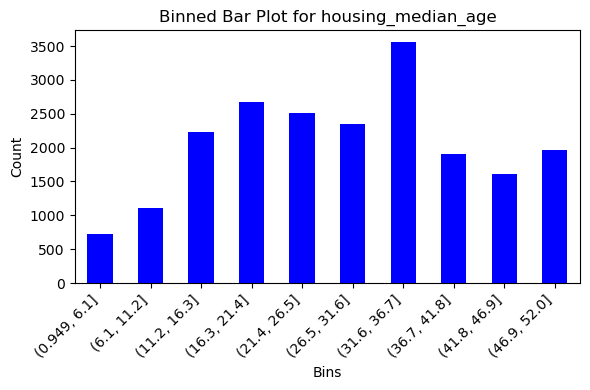

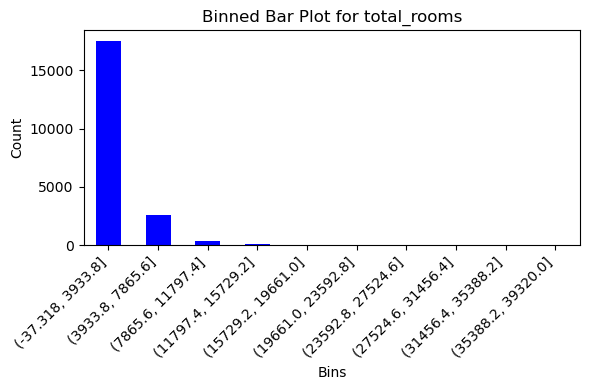

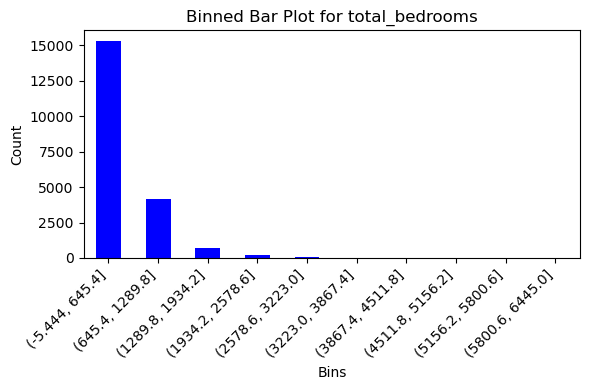

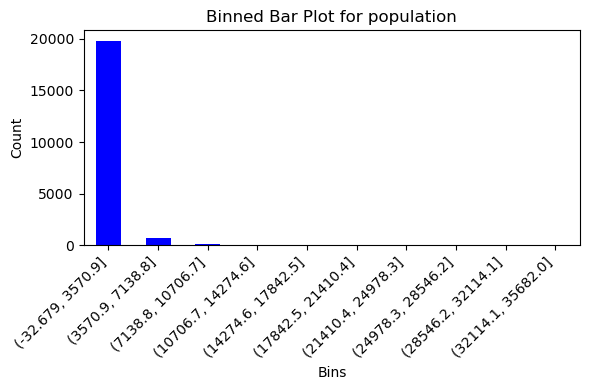

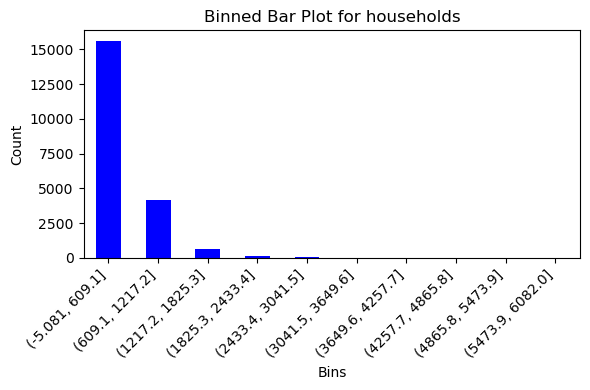

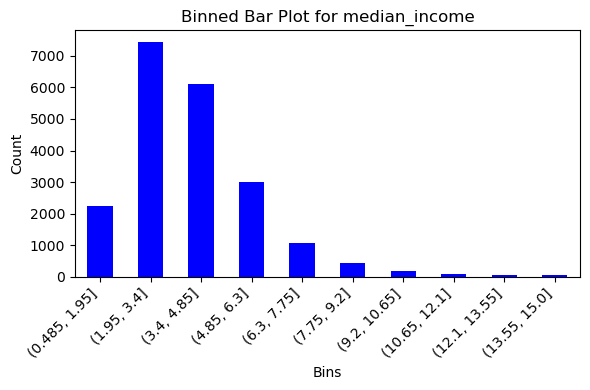

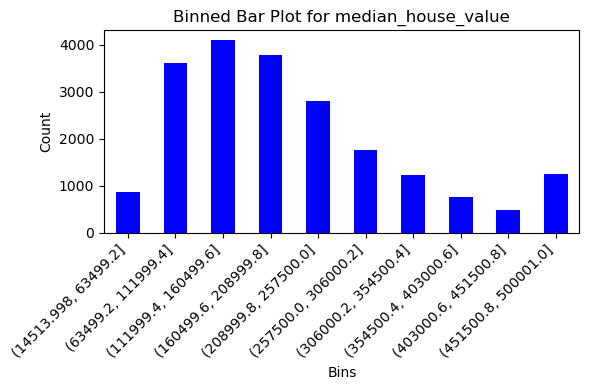

In [8]:
num_bins = 10

exclude_features = ['longitude', 'latitude']

for feature in df.columns:
    if feature not in exclude_features and df[feature].dtype != 'object':  
        # Bin the data
        binned_data, bin_edges = pd.cut(df[feature], bins=num_bins, retbins=True)
        
        # Plot the binned data
        plt.figure(figsize=(6, 4))
        binned_data.value_counts().sort_index().plot(kind='bar', color='blue')
        plt.title(f'Binned Bar Plot for {feature}')
        plt.xlabel('Bins')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()



### Finding columns with missing values

In [9]:
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Columns with missing values:\n", columns_with_missing_values)

Columns with missing values:
 total_bedrooms    207
dtype: int64


We can clearly see column named "total_bedrooms" have missing values at 207 places, we can also get the same conclusion when we look at he count of total_bedrooms in the descriptive statistics which has only 20433 values whereas total count of data is 20640.

### Creating a function to better understand the importance of Imputing the missing values

The fucntion below has Data Frame Object and a statistic (mean, median, mode) as an input and it returns another Data Frame Object as an output with imputed values with the given statistic, furthermore it also plots a Histogram with Kernel Density Estimate (KDE) overlay, to better understand the data before and after imputation.

In [10]:
def plot_missing_value_imputation(df, method='mean'):
    
    # Identifing columns with missing values
    missing_values_per_column = df.isnull().sum()
    columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0].index

    for column in columns_with_missing_values:
        plt.figure(figsize=(14, 6))
        
        # Plotting Before Imputation
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Before Imputation: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Imputing Missing Values
        if method == 'mean':
            fill_value = df[column].mean()
        elif method == 'median':
            fill_value = df[column].median()
        elif method == 'mode':
            fill_value = df[column].mode()[0]

        df_temp = df.copy()
        
        # Filling the values with the statistic
        df_temp[column].fillna(fill_value, inplace=True)

        # Plotting After Imputation
        plt.subplot(1, 2, 2)
        sns.histplot(df_temp[column], kde=True, color='green')
        plt.title(f'After Imputation ({method.capitalize()}): {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Displaying the plot
        plt.tight_layout()
        plt.show()

    return df_temp

Calling the function with median given as imputing variable.

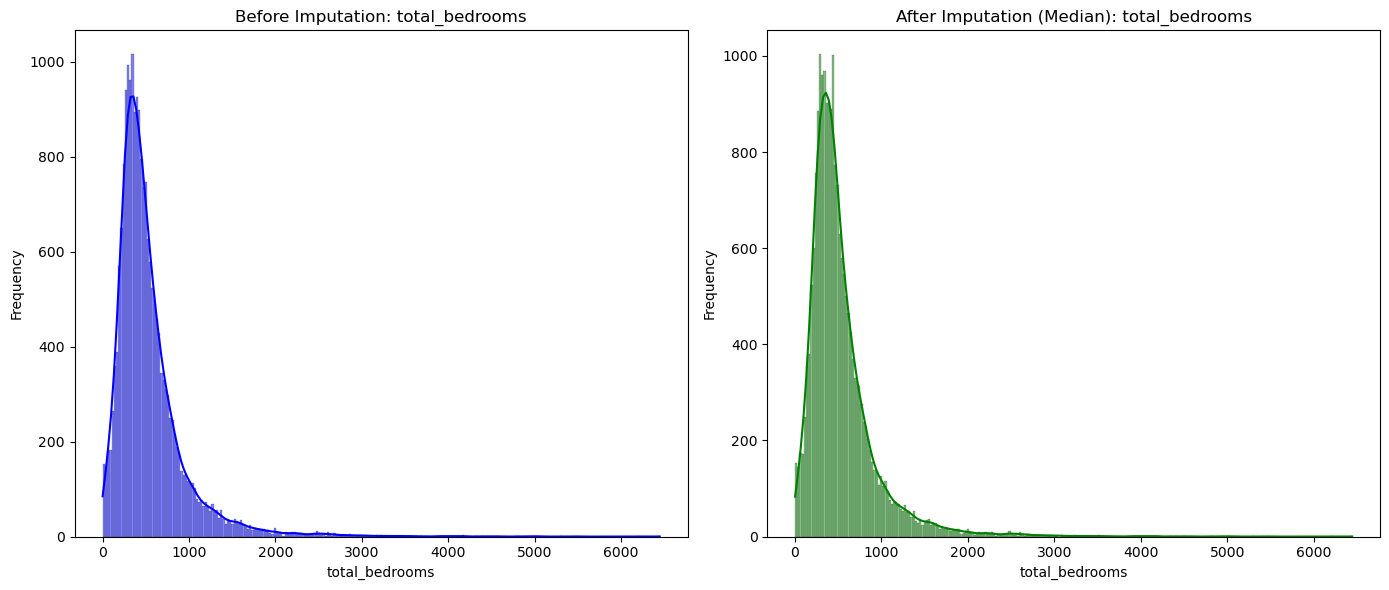

In [11]:
df_imputed_median = plot_missing_value_imputation(df, method='median')

Comparing both graphs we can clearly see that in the second graph near the peak there is a difference in the peaks as the missing values are replaced by the median so we see a sharp increase in frequency of the median of total_bedrooms.

Calling the function with mean given as imputing variable.

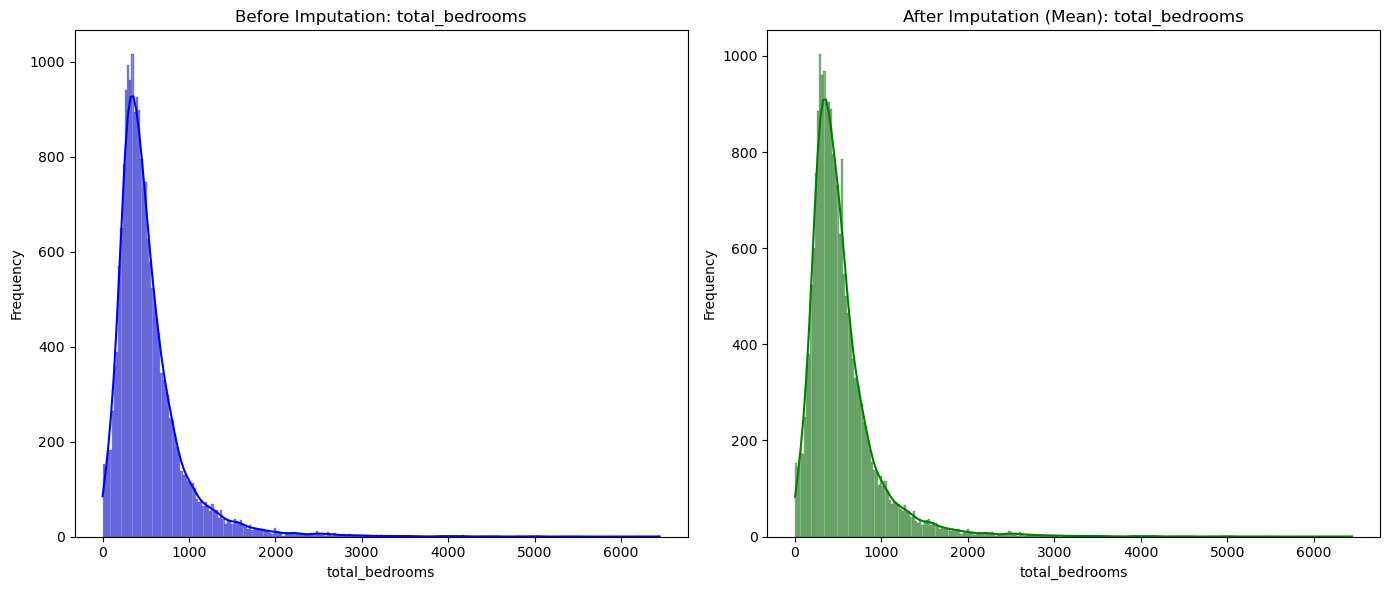

In [12]:
df_imputed_mean = plot_missing_value_imputation(df, method='mean')

Calling the function with mode given as imputing variable.

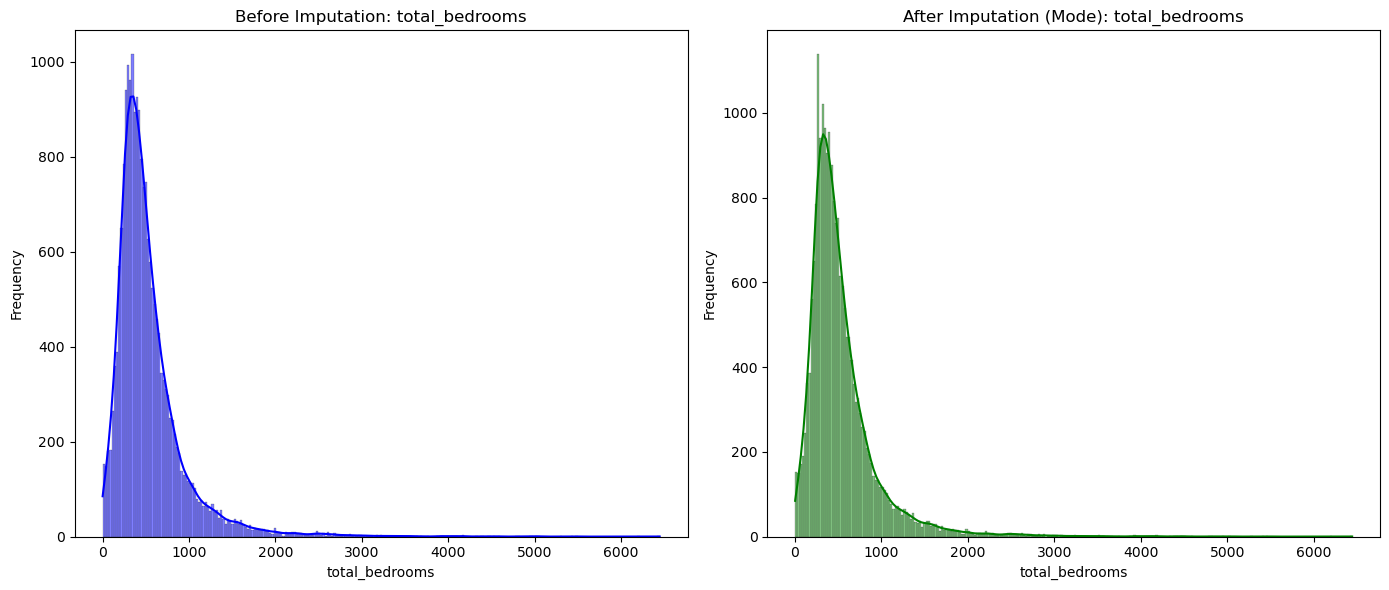

In [13]:
df_imputed_mean = plot_missing_value_imputation(df, method='mode')

- For this dataset we will be using **df_imputed_median** DataFrame for further learning.

### Checking again if there is any missing values in the Data Frame after Imputation

In [14]:
missing_values_per_column = df_imputed_median.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Columns with missing values:\n", columns_with_missing_values)

Columns with missing values:
 Series([], dtype: int64)


There are no missing values left in the Data Frame

### Checking for Duplicates in the Data Frame

In the below lines of code we are identifying duplicate values and printing their number in the Data Frame

In [15]:
# Identifying duplicate rows
duplicates = df_imputed_median.duplicated()

# Counting number of duplicate rows
num_duplicates = duplicates.sum()

# Displaying the duplicate rows
print("Number of duplicate rows:", num_duplicates)
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])


Number of duplicate rows: 0


There are **no duplicates rows** therefore we don't need to drop any rows

In [16]:
# Replacing df with imputed Data Frame
df = df_imputed_median

### Visualizing the relationship between Longitude and Latitude.

Now we are using Matplotlib to create a Python code snippet which generates a scatter plot visualizing the relationship between longitude and latitude, with the color of each data point representing the corresponding median house value.

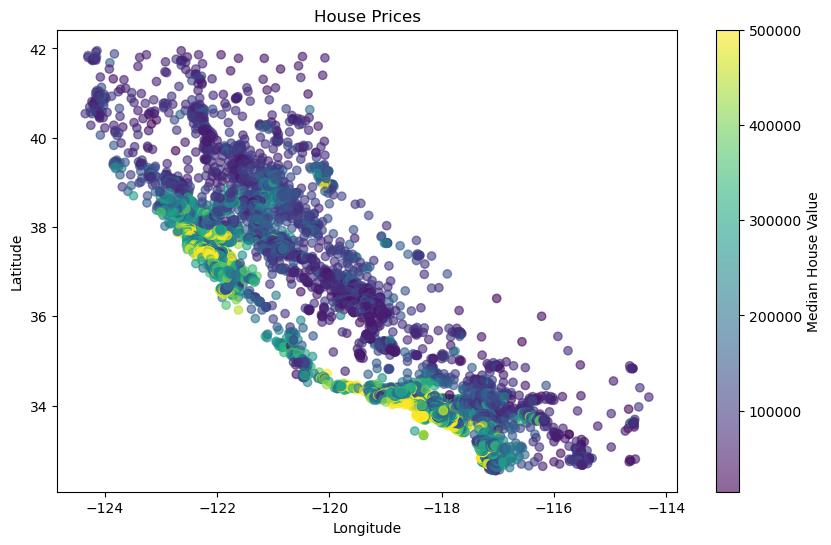

In [17]:
# Creating Scatter Plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with color representing the median house value
sc = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6)

# Adding a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Median House Value')

# Labeling 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices')

# Displaying the Plot
plt.show()

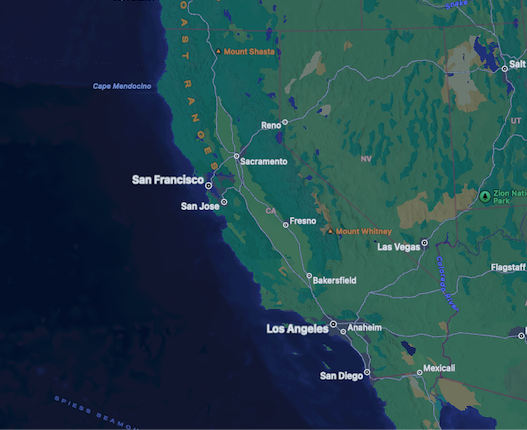

## Data Exploration and Wrangling

 ### 1. Number of houses having total Bedrooms less than 2000

In [18]:
df[df['total_rooms']<=2000].shape

(9421, 10)

there are 9421 houses having total number of bedrooms less than or equal to 2000

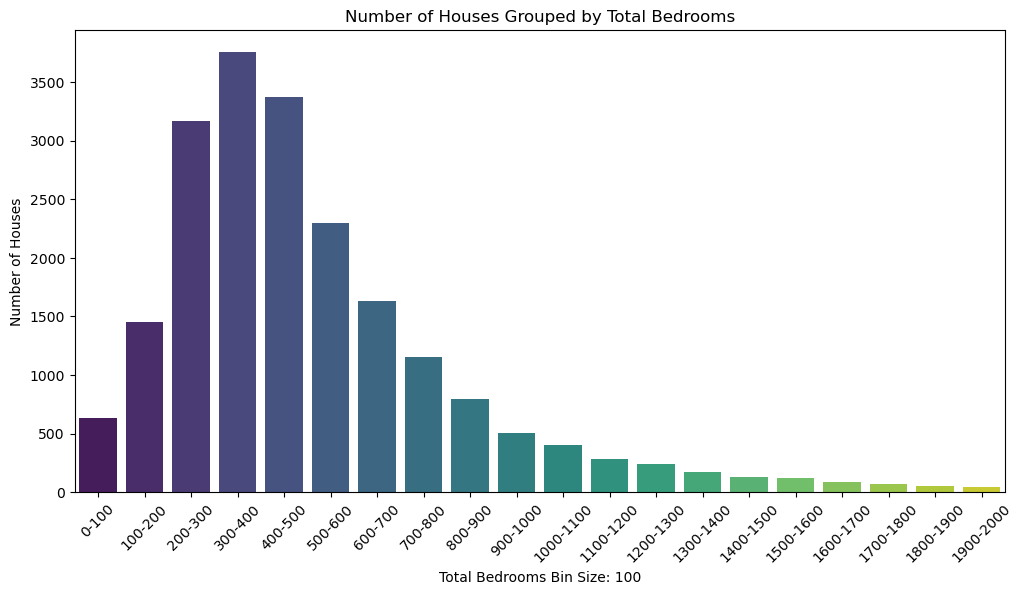

In [19]:
# Defining bins for grouping total bedrooms into ranges of 100
bins = range(0, 2100, 100)  # This will create bins: 0-100, 100-200, ..., 1500-1600
labels = [f'{i}-{i+100}' for i in bins[:-1]]

# Cutting the total_bedrooms into bins
bedroom_bins = pd.cut(df['total_bedrooms'], bins=bins, labels=labels, right=False)

# Counting the number of houses in each bin
bedroom_count = bedroom_bins.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=bedroom_count.index, y=bedroom_count.values, palette='viridis')
plt.title('Number of Houses Grouped by Total Bedrooms')
plt.xlabel('Total Bedrooms Bin Size: 100')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()


- By observing the graph we conclude that most of the houses are lying in the range of 200 to 700 total_bedrooms, and as we go higher in the range of total bedrooms we see a gradual decrease in number of houses.
- Which tells that there are less houses with high number of bedrooms.

 ### 2. Analysing people with Median Income more than 10

Here we are trying to understand what type of house people with income more than 10 are owning.

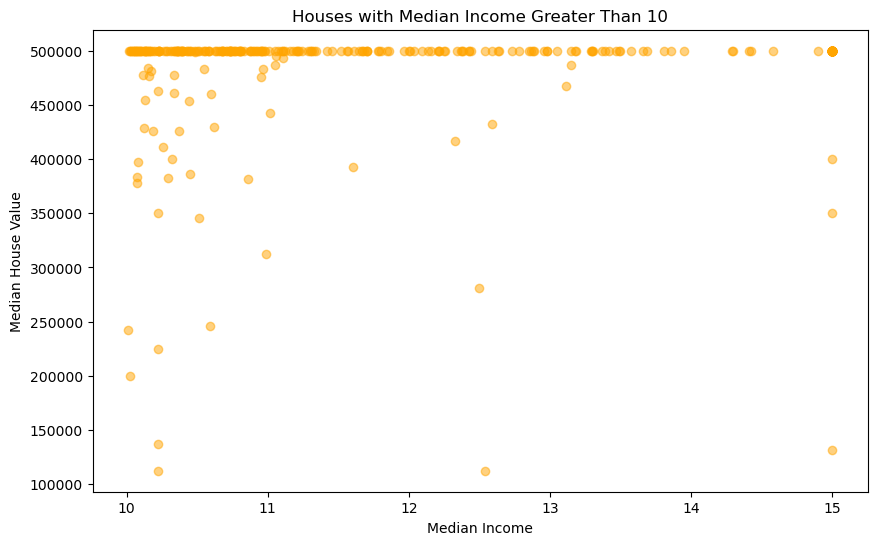

In [20]:
# Filtering Data Frame for houses with median income more than 10
income_filter = df[df['median_income'] > 10]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(income_filter['median_income'], income_filter['median_house_value'], c='orange', alpha=0.5)
plt.title('Houses with Median Income Greater Than 10')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


We saw that people having income more than 10 are more likely to buy a expensive house as most them are buying house worth 500000 which should be the maximum value of the house in California

 ### 3. Comparing effect of Ocean Proximity to the price of the house

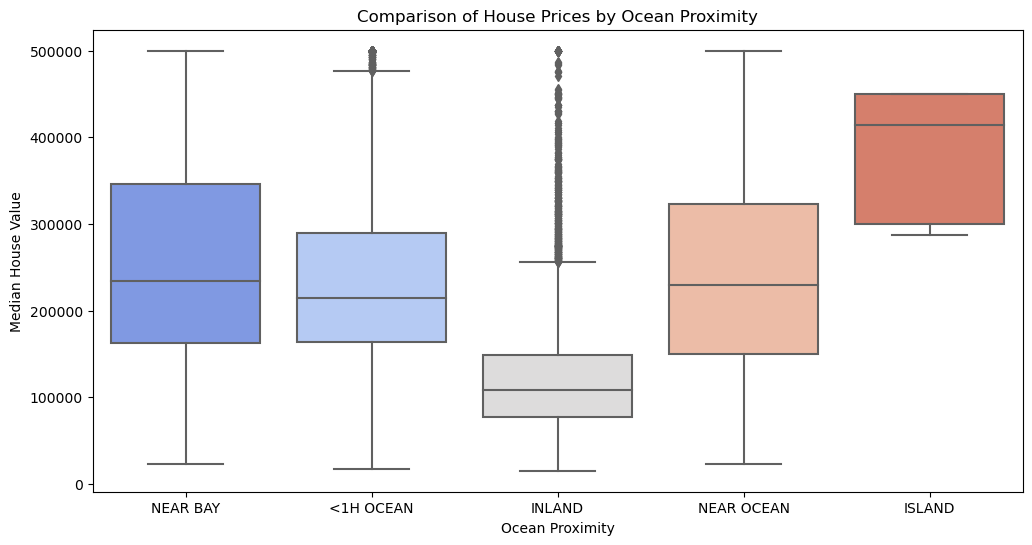

In [21]:
plt.figure(figsize=(12, 6))

# Using Box Plot
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='coolwarm')
plt.title('Comparison of House Prices by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

- **Near Bay** and **Near Ocean** categories have higher median house values compared to other categories, indicating that proximity to water (whether a bay or ocean) increases house prices.
- **Island** category also shows high house prices, with a tight distribution and fewer outliers, indicating that houses on islands are generally expensive and have a narrower range of prices.
- **Inland** category have the lowest median house value and a larger spread of data, indicating more variability in house prices inland.
- **Within 1 hour Ocean** have a lower median price than those near the bay or ocean but higher than inland houses. The spread is also narrower compared to inland houses.

### 4. Correlation Between Population and Total Rooms

Now we want to analyze relation between population and total rooms using a Scatter Plot.

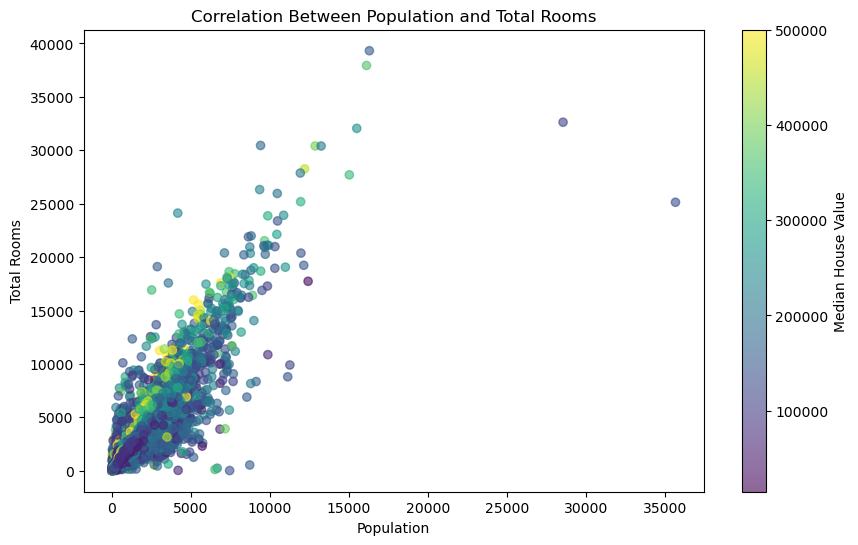

In [22]:
# Scatter plot to show the correlation between population and total rooms
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['total_rooms'], c=df['median_house_value'], cmap='viridis', alpha=0.6)
plt.title('Correlation Between Population and Total Rooms')
plt.xlabel('Population')
plt.ylabel('Total Rooms')
plt.colorbar(label='Median House Value')
plt.show()


- There’s a clear **positive correlation** between population and total rooms. As the population increases, the number of rooms also tends to increase, which is expected in larger residential areas.
- Most of the data points are clustered in the **lower range** of population and total rooms. This suggests that the majority of the neighborhoods have smaller populations and fewer total rooms.

### Relationship Between Ocean Proximity and other Numerical Features

Observing change in other numerical features with change in Ocean Proximity.

#### Grouping the data by ocean_proximity and calculating summary statistics for each group.

In [23]:
grouped = df.groupby('ocean_proximity').describe()
print(grouped)

# Encoding ocean_proximity
ocean_proximity_le = LabelEncoder()
df['ocean_proximity'] = ocean_proximity_le.fit_transform(df['ocean_proximity'])


                longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND     

#### Visualizing the distribution of a target variable

Target Variable: Median House value

- 0: <1H OCEAN
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

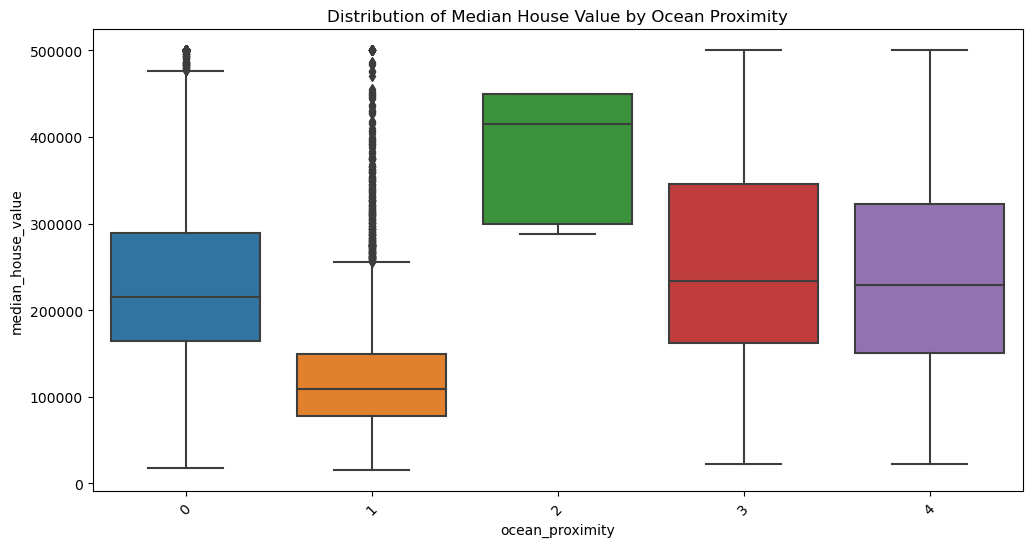

In [24]:
# Visualizing the distribution of median_house_value
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.show()


- 0: <1H OCEAN
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

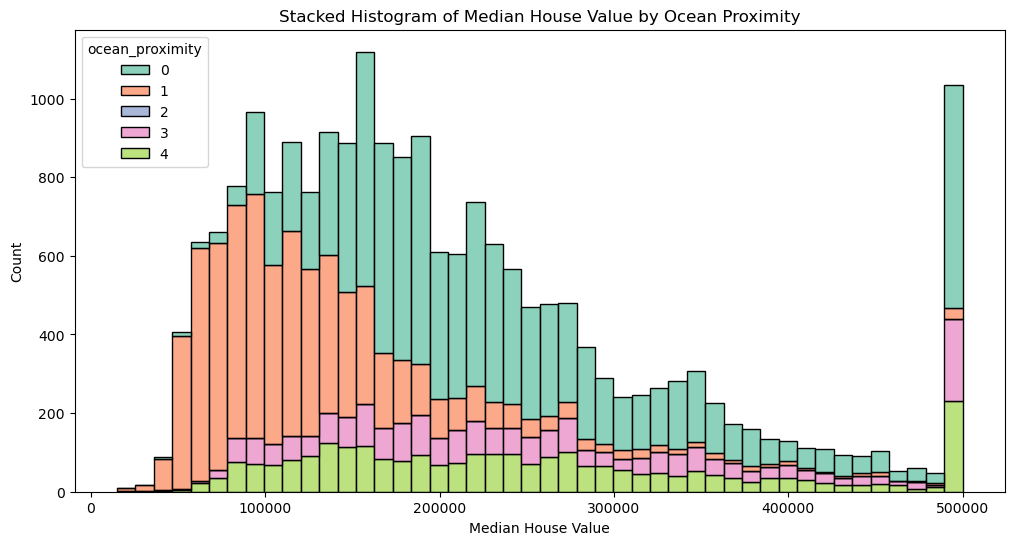

In [25]:
# Histogram to visualize the distribution of house values per category
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='median_house_value', hue='ocean_proximity', multiple='stack', palette='Set2')
plt.title('Stacked Histogram of Median House Value by Ocean Proximity')
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.show()

- 0: <1H OCEAN
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

- The orange bars (INLAND) dominate across almost all house value ranges, especially in lower price ranges. This suggests that the majority of the data points are from areas farther away from the ocean.
- Categories pink (NEAR BAY) and blue (ISLAND) are rare and exclusive locations.

#### Making a Correlation Heatmap with Encoded Ocean Proximity

Ocean Proximity Encoding Mapping:
{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}


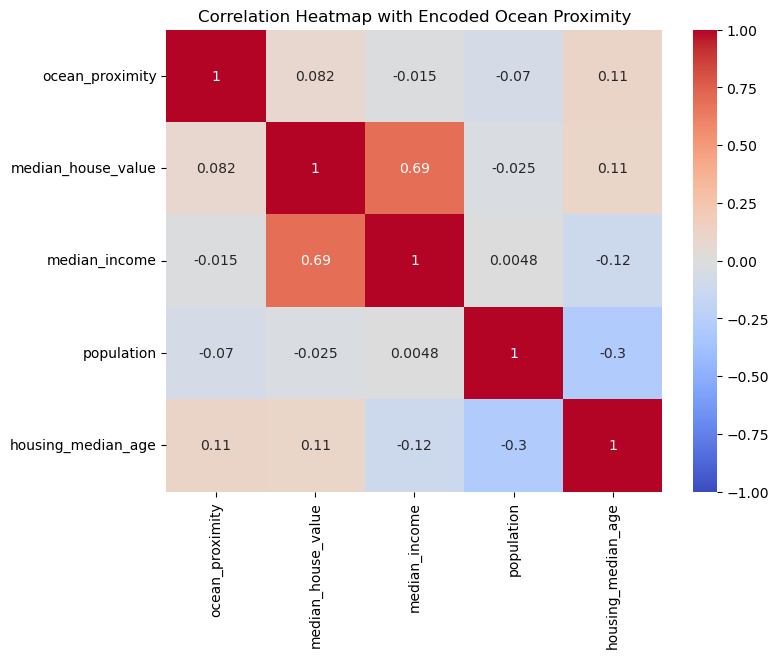

In [26]:
# Display the mapping from categories to encoded values
encoded_mapping = dict(zip(ocean_proximity_le.classes_, ocean_proximity_le.transform(ocean_proximity_le.classes_)))
print("Ocean Proximity Encoding Mapping:")
print(encoded_mapping)

# Analyzing correlations after encoding
plt.figure(figsize=(8, 6))
corr = df[['ocean_proximity', 'median_house_value', 'median_income', 'population', 'housing_median_age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Encoded Ocean Proximity')
plt.show()

- Proximity to the ocean has a relatively small impact on house prices when compared to income.
- Strong Correlation between median house value and median income suggests income remains a primary driver of house prices in this dataset.
- Population also has weak Correlation between other features this means population does not affect other variables.
- There is an interesting relationship between housing age and proximity to the ocean, indicating that certain coastal or near-ocean areas may have older properties.

### Correlation Heatmap of the Dataset

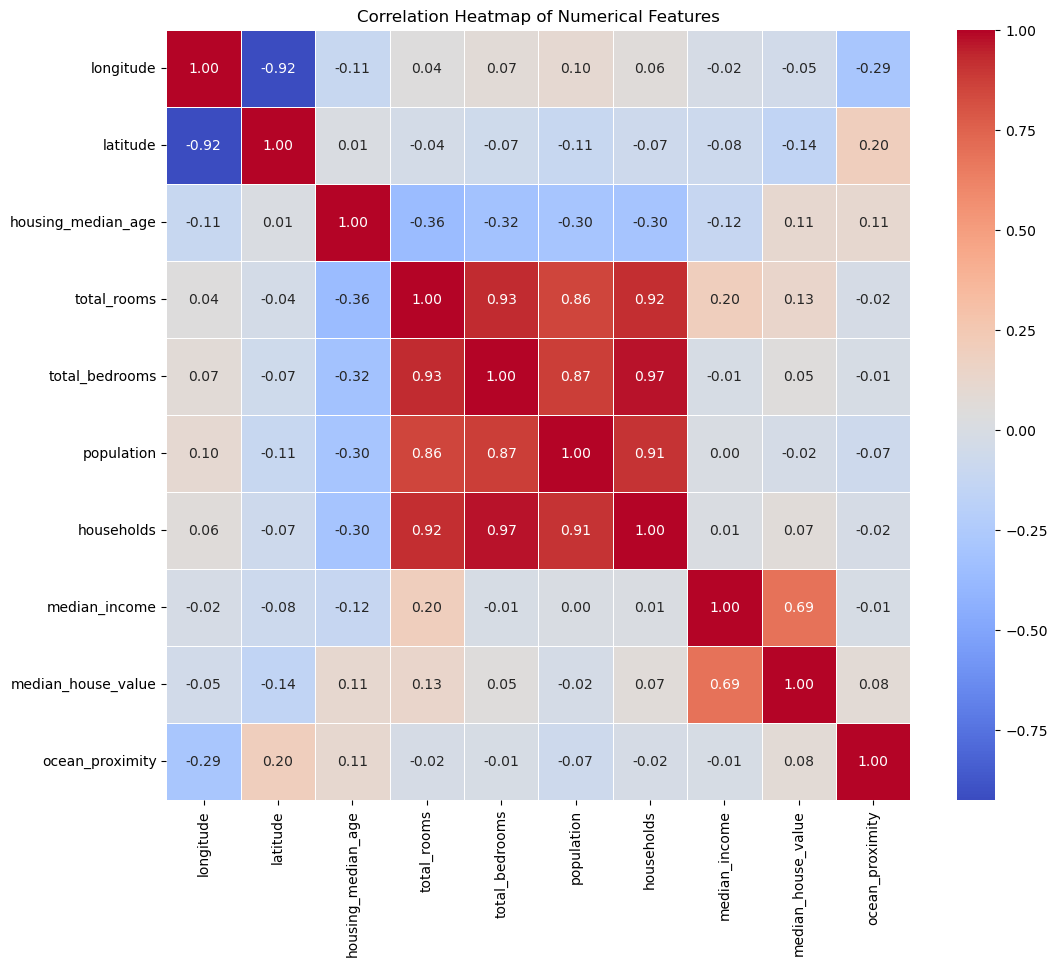

In [27]:
# Correlation matrix
corr_matrix = df.corr()

# Plotting the HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Income remains the strongest predictor of house values.
- Houses with more total rooms tend to have a higher value
- Ocean proximity has a limited influence when directly compared to other numerical features.
- The dataset is highly interdependent for features related to rooms, households, and population.
- This analysis tells us which features are most relevent in predicting the house prices
    - Income (0.69)
    - Total rooms (0.13)
    - Housing Median Age (0.11)
    - Households (0.07)
    - Ocean Proximity (0.08)

### Generating Box Plot for all Numerical Features 

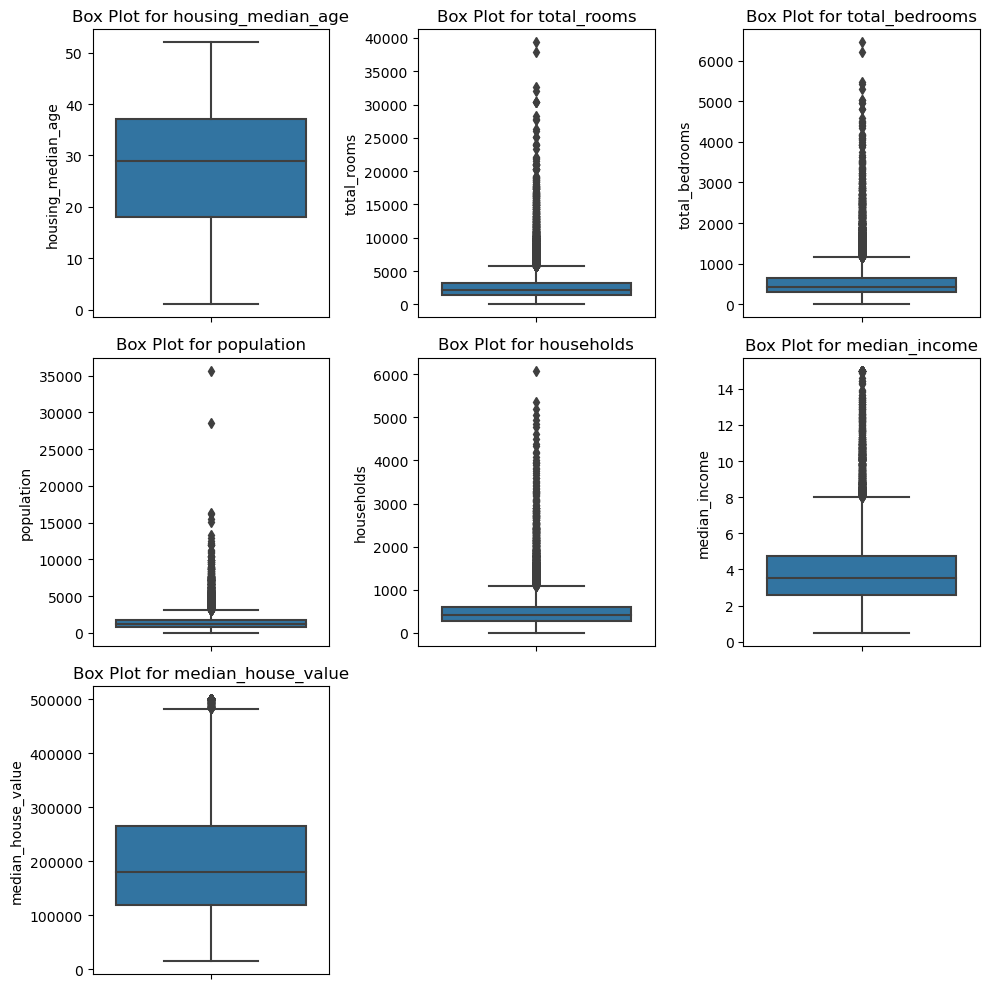

In [28]:
# List of numerical features in the dataset
numerical_features = ['housing_median_age', 'total_rooms', 
                      'total_bedrooms', 'population', 'households', 'median_income', 
                      'median_house_value']

# Plotting Box Plot of all Numerical Features
plt.figure(figsize=(10, 10))

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()


- Total Rooms and Bedrooms:
    - Numerous outliers are present, indicating that some areas have an exceptionally high number of rooms compared       to others.
    - These outliers could represent large apartment complexes or areas with highly dense housing.
- Population:
    - Significant outliers suggest that some areas have a very high population, which could indicate densely             populated urban areas or specific neighborhoods with large residential buildings.
- Households:
    - Outliers here suggest that some areas have a disproportionately high number of households, potentially             indicating large residential complexes.
- Median Income:
    - There are a few outliers on the higher end of the income scale, suggesting some areas are much wealthier than       others.
- Median House Value:
    - Outliers in house value indicate that some properties are valued significantly higher than others, possibly         due to location or the type of housing.

### Potential Feature Importance

- Features like **Median Income**, **Total Rooms**, **Ocean Proximity** are likely to be the most important predictors.
- **Total Rooms**, **Total Bedrooms** and **Populations** could have significant impact as they have high number of outliers.

### Analyzing Premium houses based on Ocean proximity, Cost per square foot, and Median income.

Creating a new Feature cost_per_sqft by dividing median_house_value by total_rooms.
This gives out cost per room but since both cost per square feet and cost per room represent similar statistic therefore we are asumming cost per square feet as cost per room.

In [29]:
df['cost_per_sqft'] = df['median_house_value'] / df['total_rooms']

Defining premium houses as those with median_house_value greater than 75th percentile.

In [30]:
premium_threshold = df['median_house_value'].quantile(0.75)
df['is_premium'] = df['median_house_value'] > premium_threshold

Making a Box Plot

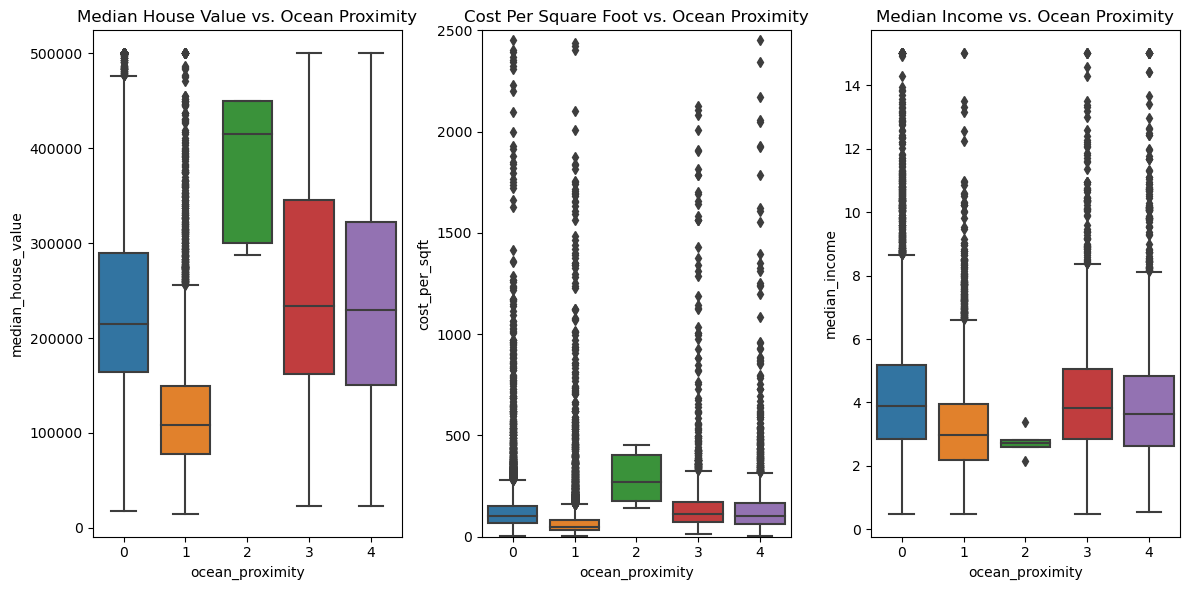

In [31]:
#Filtering Ocean Proximity 2 and 3
df_filtered = df[df['ocean_proximity'].isin([0,1,2,3,4])]

#Plotting
plt.figure(figsize=(12, 6))

# Box plot for median house value
plt.subplot(1, 3, 1)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_filtered)
plt.title('Median House Value vs. Ocean Proximity')

# Box plot for cost per square foot
plt.subplot(1, 3, 2)
sns.boxplot(x='ocean_proximity', y='cost_per_sqft', data=df_filtered)
plt.title('Cost Per Square Foot vs. Ocean Proximity')
plt.ylim(0, 2500)  # Adjusting y-axis for better visualization

# Box plot for median income
plt.subplot(1, 3, 3)
sns.boxplot(x='ocean_proximity', y='median_income', data=df_filtered)
plt.title('Median Income vs. Ocean Proximity')

plt.tight_layout()
plt.show()

- 0: <1H OCEAN
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

- Properties in island tend to have higher house values and cost per square foot.
- The median house value of inland properties are at a lower value.

### Developing a Python function to visualize the distribution and relationship of a specified numerical column within a dataset.

In [32]:
def visualize_distribution_relationship(df, column):
    # Styling
    sns.set(style="whitegrid")

    # Creating three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # KDE plot
    sns.kdeplot(df[column], ax=axes[0], fill=True, color="blue")  
    axes[0].set_title(f'KDE of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color="orange")
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    # Scatterplot with 'median_house_value'
    sns.scatterplot(x=df[column], y=df['median_house_value'], ax=axes[2], color="green")
    axes[2].set_title(f'{column} vs. Median House Value')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Median House Value')
    plt.tight_layout()

    plt.show()


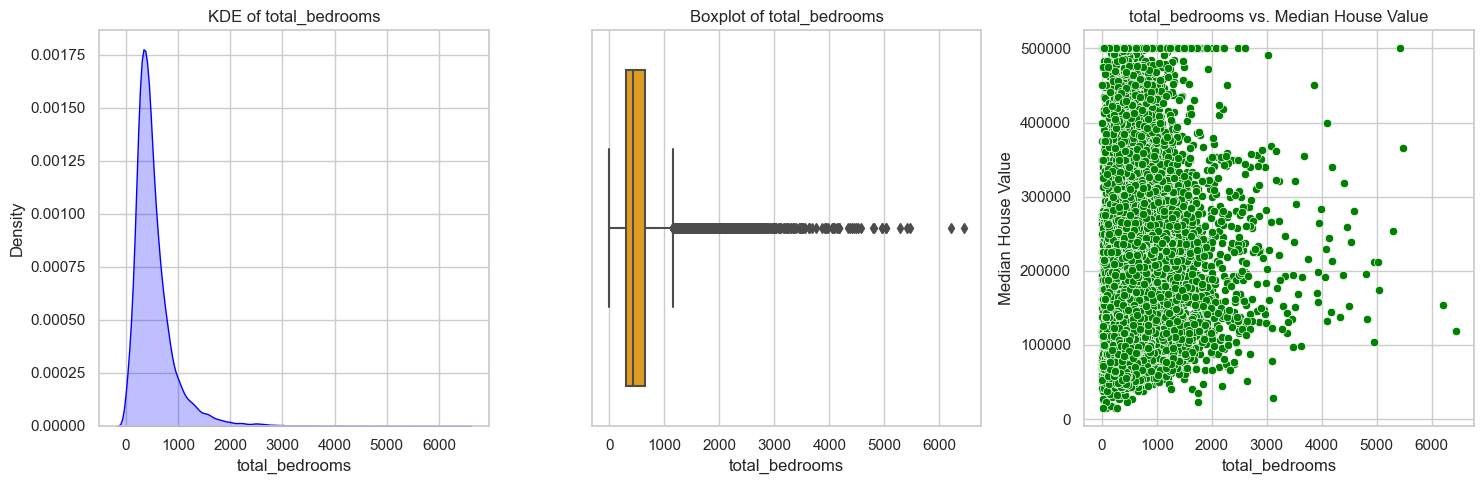

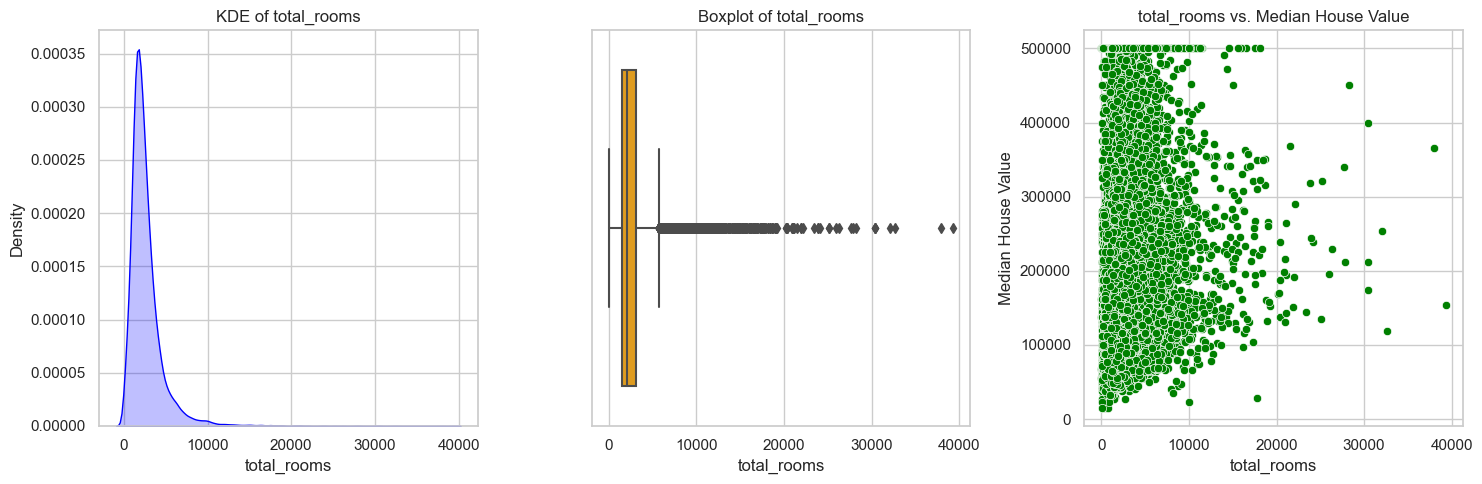

In [33]:
visualize_distribution_relationship(df, 'total_bedrooms')
visualize_distribution_relationship(df, 'total_rooms')

- While there is a general trend that more bedrooms or more rooms correlate with higher house values, the relationship is not strongly linear, indicating other factors are likely influencing the house values as well.

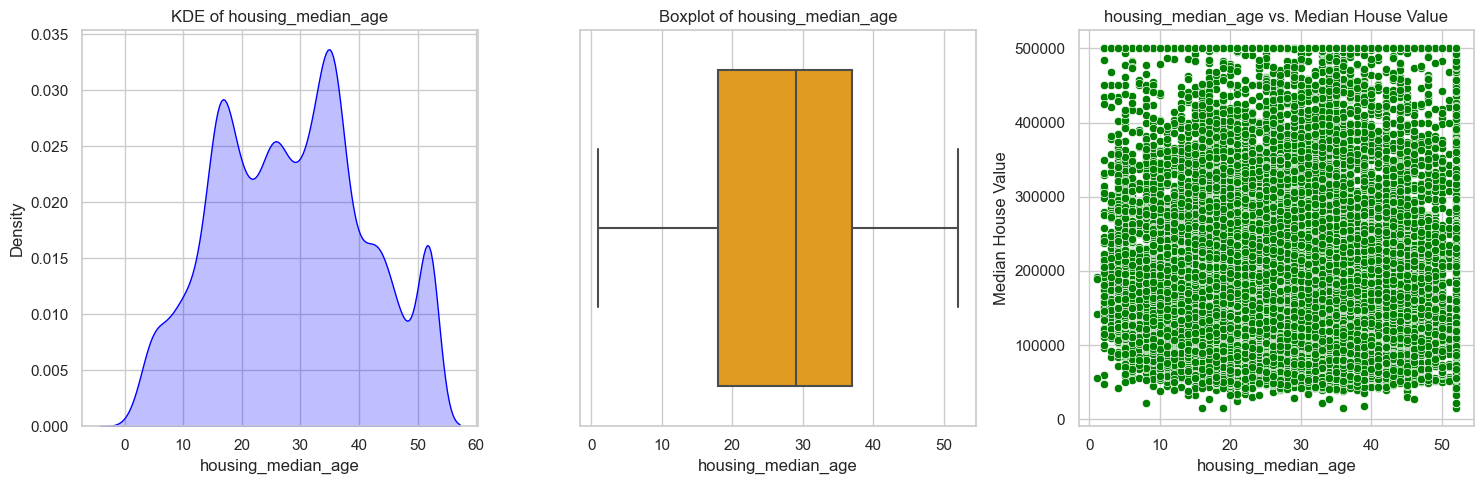

In [34]:
visualize_distribution_relationship(df, 'housing_median_age')

- While the age of housing varies, it doesn’t strongly predict house value, although newer houses might slightly trend towards higher values.

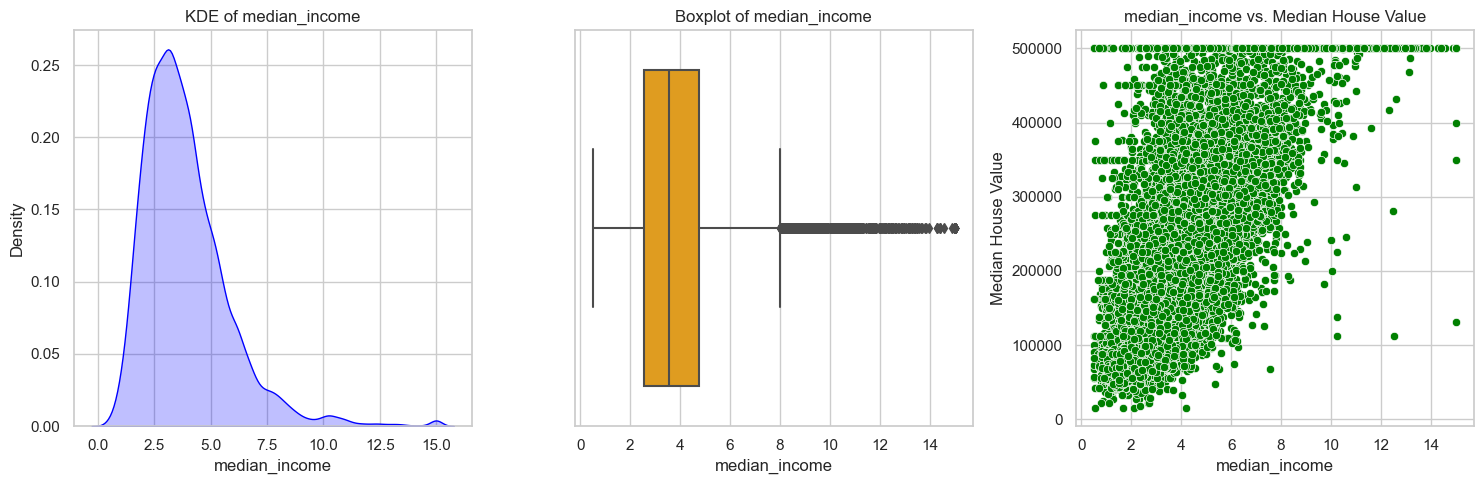

In [35]:
visualize_distribution_relationship(df, 'median_income')

- There is a strong positive correlation between income and house value, with higher incomes typically leading to higher house prices, although a cap on house prices is evident in high-income areas.

### Identifying and visualizing outliers in a numerical column of a dataset based on Standard Deviation.

In [36]:
def identify_and_visualize_outliers(df, column):

    # Calculating the mean and standard deviation of the column
    mean = df[column].mean()
    std_dev = df[column].std()

    # Calculating the lower and upper bounds (within 95% of the data)
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Calculating the total number of outliers
    total_outliers = outliers.shape[0]
    print(f'Total number of outliers in {column}: {total_outliers}')

    # Plotting
    plt.figure(figsize=(12, 6))

    # Bar plot (histogram) of the column
    sns.histplot(df[column], bins=30, kde=False, color="blue", label="Data Distribution")
    
    # Highlight the outlier regions
    plt.axvspan(xmin=min(df[column]), xmax=lower_bound, color="red", alpha=0.3, label="Outlier Region")
    plt.axvspan(xmin=upper_bound, xmax=max(df[column]), color="red", alpha=0.3)
    
    # Add vertical lines for mean and bounds
    plt.axvline(mean, color='green', linestyle='--', label='Mean')
    plt.axvline(lower_bound, color='orange', linestyle='--', label='Lower Bound (-2 std)')
    plt.axvline(upper_bound, color='orange', linestyle='--', label='Upper Bound (+2 std)')

    plt.title(f'Outlier Detection in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()

#### Number of outliers in some intresting features:

Total number of outliers in median_house_value: 1383


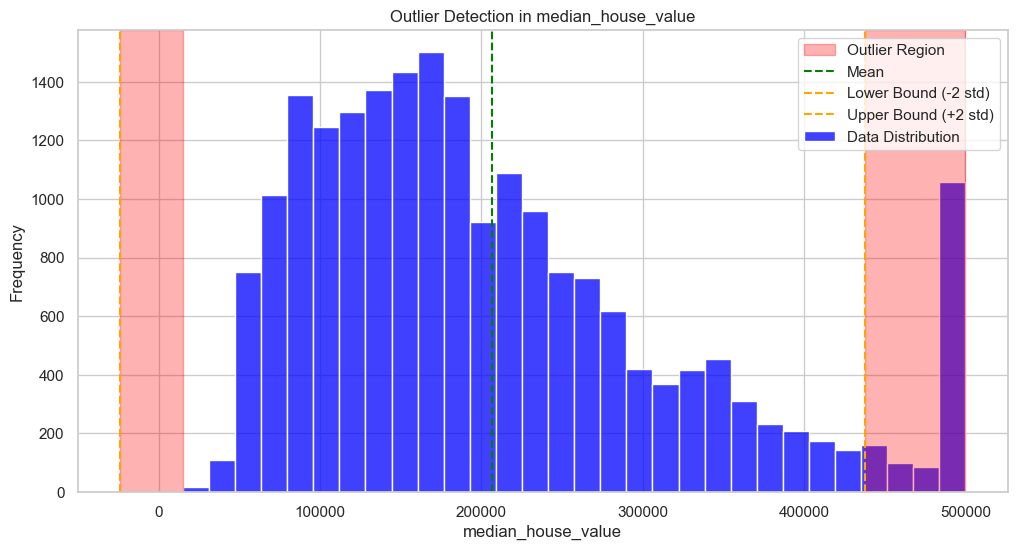

In [37]:
identify_and_visualize_outliers(df, 'median_house_value')

Total number of outliers in median_income: 851


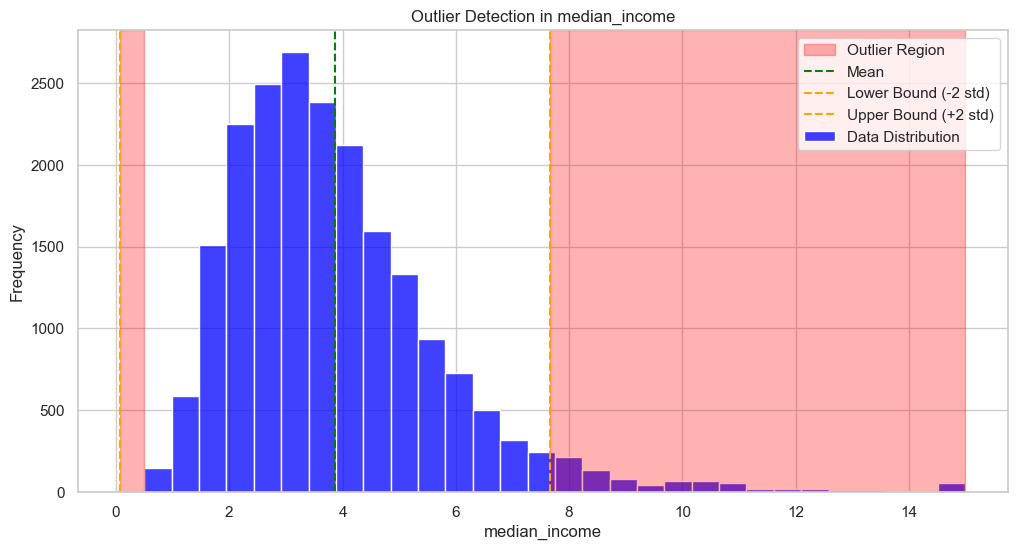

In [38]:
identify_and_visualize_outliers(df, 'median_income')

Total number of outliers in total_rooms: 742


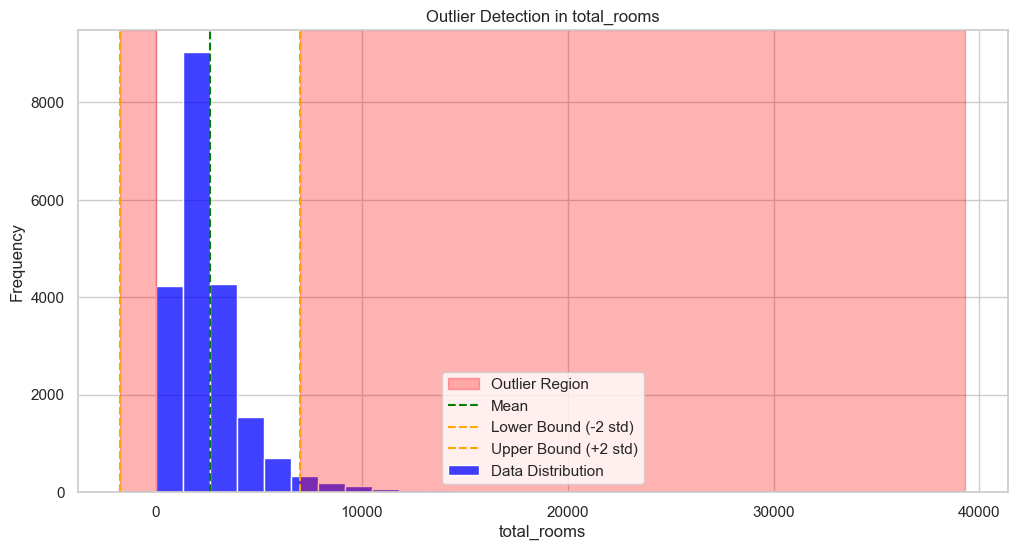

In [39]:
identify_and_visualize_outliers(df, 'total_rooms')

Total number of outliers in households: 813


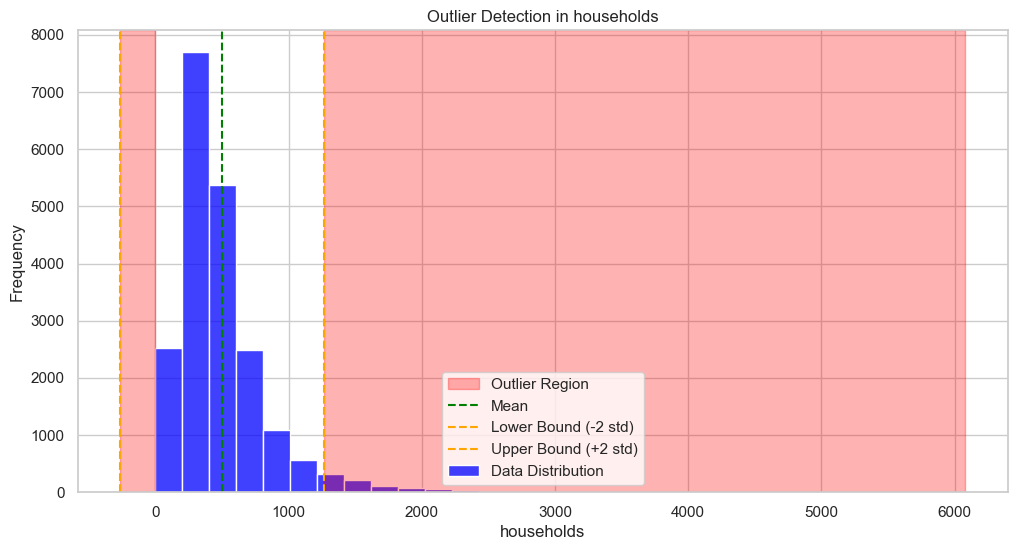

In [40]:
identify_and_visualize_outliers(df, 'households')

Total number of outliers in population: 756


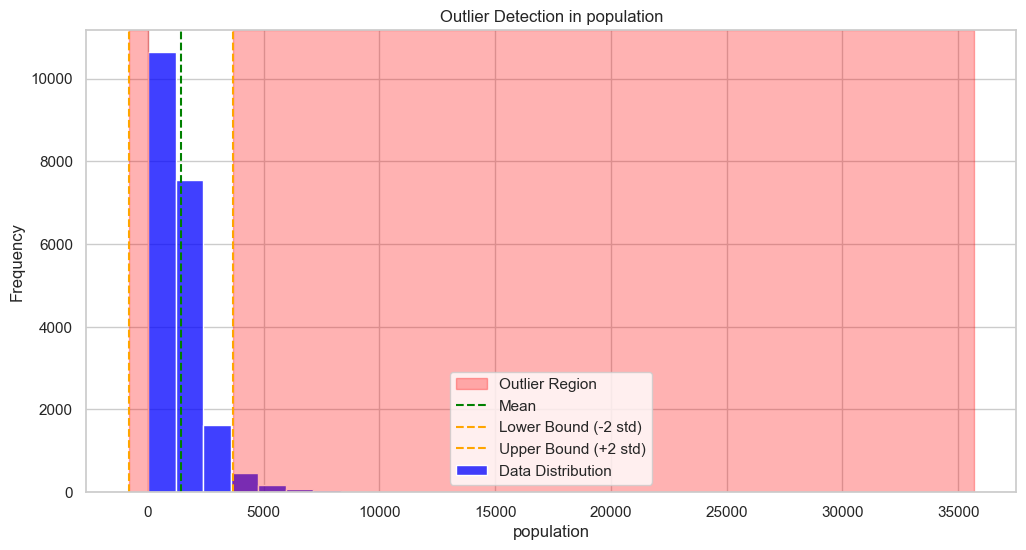

In [41]:
identify_and_visualize_outliers(df, 'population')

### Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Creating a dummy Dataframe to keep the original DataFrame safe
df_s = df 

# Splitting the data into x and y for better analysis.
X = df_s.drop(['median_house_value'], axis=1)
y = df_s['median_house_value']

# MinMaxScaler
mm_scaler = MinMaxScaler()
x_mm = mm_scaler.fit_transform(X)

# StandardScaler
s_scaler = StandardScaler()
x_s = s_scaler.fit_transform(X)

# Converting to DataFrame
x_mm_df = pd.DataFrame(x_mm, columns=X.columns)
x_s_df = pd.DataFrame(x_s, columns=X.columns)

In [43]:
# MinMaxScaler
print("MinMaxScaler:\n", x_mm_df.describe().loc[['min', 'max']])

MinMaxScaler:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min        0.0       0.0                 0.0          0.0             0.0   
max        1.0       1.0                 1.0          1.0             1.0   

     population  households  median_income  ocean_proximity  cost_per_sqft  \
min         0.0         0.0            0.0              0.0            0.0   
max         1.0         1.0            1.0              1.0            1.0   

     is_premium  
min         0.0  
max         1.0  


- $X' = \frac{X - X_{min}}{X_{max} - X_{min}}$
- Range of MinMaxScaler is [0,1]
- MinMaxScaler converts all the numerical featurs into the range of [0,1]
- **Benefits:** Keeps the data within a specific range (0 to 1), which is useful for algorithms sensitive to the scale of features.
- **Drawbacks:** Sensitive to outliers, which can skew the range.

In [44]:
# StandardScaler
print("StandardScaler:\n", x_s_df.describe().loc[['min', 'max']])

StandardScaler:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min  -2.385992 -1.447568           -2.196180    -1.207283       -1.277688   
max   2.625280  2.958068            1.856182    16.815580       14.087789   

     population  households  median_income  ocean_proximity  cost_per_sqft  \
min   -1.256123   -1.303984      -1.774299        -0.820653      -0.183837   
max   30.250330   14.601520       5.858286         1.995003      82.030476   

     is_premium  
min   -0.577350  
max    1.732051  


- $ z = \frac{x−μ}{σ} $
- StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one.
- **Benefits:** Centers the data around zero with unit variance, making it appropriate for algorithms that assume normally distributed data.
- **Drawbacks:** Does not bound the data within a specific range, which might be less suitable for models that require normalized input.

In [45]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer

# Applying RobustScaler
robust_scaler = RobustScaler()
x_robust = robust_scaler.fit_transform(X)

# Applying QuantileTransformer (with uniform output)
quantile_transformer = QuantileTransformer(output_distribution='uniform')
x_quantile = quantile_transformer.fit_transform(X)

# Applying PowerTransformer (Yeo-Johnson method)
power_transformer = PowerTransformer(method='yeo-johnson')
x_power = power_transformer.fit_transform(X)

# Convert to DataFrames
x_robust_df = pd.DataFrame(x_robust, columns=X.columns)
x_quantile_df = pd.DataFrame(x_quantile, columns=X.columns)
x_power_df = pd.DataFrame(x_power, columns=X.columns)


In [46]:
print("RobustScaler:\n", x_robust_df.describe().loc[['min', 'max']])

RobustScaler:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min  -1.546174 -0.455026           -1.473684    -1.249816       -1.253430   
max   1.102902  2.034392            1.210526    21.875018       17.357401   

     population  households  median_income  ocean_proximity  cost_per_sqft  \
min   -1.239872   -1.255385      -1.392252             -1.0      -0.920940   
max   36.797441   17.455385       5.259674              3.0     762.198189   

     is_premium  
min         0.0  
max         4.0  


- **RobustScaler**
    - RobustScaler removes the median and scales the data according to the Interquartile Range (IQR). This makes it robust to outliers since the IQR is not affected by extreme values.
    - Advantages :
        - **Outlier Resistance:** RobustScaler is particularly advantageous when the dataset contains outliers that could skew the scaling if using methods like StandardScaler or MinMaxScaler. It ensures that the scaling is not overly influenced by extreme values.
    - Drawbacks :
         - **Range Uncertainity:** The values are not in a particular range which is sometimes counter-intuitive      whereas in MinMaxScaler we saw a fixed range [0,1].

In [47]:
print("QuantileTransformer:\n", x_quantile_df.describe().loc[['min', 'max']])

QuantileTransformer:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min        0.0       0.0                 0.0          0.0             0.0   
max        1.0       1.0                 1.0          1.0             1.0   

     population  households  median_income  ocean_proximity  cost_per_sqft  \
min         0.0         0.0            0.0              0.0            0.0   
max         1.0         1.0            1.0              1.0            1.0   

     is_premium  
min         0.0  
max         1.0  


- **Quantile Transformer**
    -  QuantileTransformer transforms the features to follow a uniform or normal distribution. It essentially spreads out the most frequent values in the data and reduces the impact of outliers.
    - Advantages :
        - **Uniform Distribution:** It transforms the data so that each feature is uniformly distributed across the range, making it useful for algorithms that assume uniformity in the data distribution.
    - Drawbacks :
         - **Loss of Original Data Distribution:** This method may distort relationships between variables because it transforms the data to a specific distribution (uniform or normal).

In [48]:
print("PowerTransformer:\n", x_power_df.describe().loc[['min', 'max']])

PowerTransformer:
         longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min -4.024558e-15 -1.815994           -2.495561    -4.907908       -4.615094   
max  5.717649e-15  2.081529            1.761010     5.684875        5.243342   

     population  households  median_income  ocean_proximity  cost_per_sqft  \
min   -4.528522   -4.403335      -3.446085        -1.037419      -5.886913   
max    7.450619    5.439466       3.146572         1.505310       4.841905   

     is_premium  
min   -0.577350  
max    1.732051  


#### - **Power Transformer**
    -  PowerTransformer applies a power transformation (such as Yeo-Johnson or Box-Cox) to make the data more Gaussian-like (normally distributed). 
    -  Stabilizes variance and mitigates the effects of heteroscedasticity (when the variance of the target variable varies across levels of an independent variable).
    - Advantages :
        - **Gaussian-Like Distribution:** This transformation can be particularly beneficial for linear models that assume normally distributed data. It helps in stabilizing variance, making the data more homoscedastic.
    - Drawbacks :
         - **Interpretability:** The transformed data may be harder to interpret, particularly if the original data had a meaningful distribution.
#### Conclusion
- Use RobustScaler if data contains outliers or is skewed.
- Use QuantileTransformer if we need uniform distribution or if the model benefits from non-linear transformations.
- Use PowerTransformer if data needs to follow a more Gaussian distribution, particularly for linear models.